<a href="https://colab.research.google.com/github/AlvimDePaula/Maos_a_obra_Aprendizado_de_Maquina/blob/main/capitulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 3 - Classificação
Um notebook de estudo do capítulo 3 do livro "Mãos a Obra: Aprendizado de Máquina com Scikit-Learn e TensorFlow". Onde esse notebook tem como objetivo replicar os códigos expostos no capítulo da minha maneira, estudos das teorias apresentadas e resolução do exercícios.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from scipy.ndimage.interpolation import shift

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-641a4cc58a71>:18: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [ ]:
# Conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1);

# Váriavel descritiva e váriavel target
X, y = mnist['data'], mnist['target'];

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dimensões
print(' Dimensão de X:', '\n', X.shape, '\n\n', 'Dimensão de y', '\n', y.shape)

 Dimensão de X: 
 (70000, 784) 

 Dimensão de y 
 (70000,)


Número da imagem é: ['9'] 




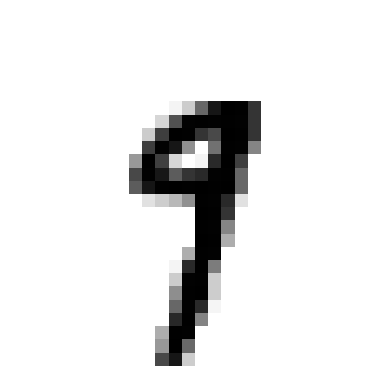

In [ ]:
# Imagem dos números que estão sendo utilizados
num_aleatorio = np.random.randint(70001, size=1)

y_imagem = np.array(y[num_aleatorio].values)
print(f'Número da imagem é: {y_imagem}', '\n\n')

some_dig = np.array(X.iloc[num_aleatorio])
some_imagem = some_dig.reshape(28, 28)

plt.imshow(some_imagem , cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show;

In [ ]:
# Conjunto de dados já tem sua separação em dados de teste e treino
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Embaralhar o conjunto de TREINO
shuffle = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle], y_train.iloc[shuffle]

# Classificador Binário

Quando valor de saída pertence a uma classe que possui dois valores possíveis.

Afim de simplificar o problema, iremos criar um algoritmo para classificar se o número é ou não é **3** (Classificação binária).

In [ ]:
# Buscando as instâncias que tenha como y == 3
y_train_3 = (y_train.astype('int32') == 3)
y_test_3 = (y_test == 3)

In [ ]:
# Instanciando o Algoritmo Gradiente Descendente Estocástico
sgd_claf = SGDClassifier(random_state=14)

# Treinamento
sgd_claf.fit(X_train, y_train_3)

# Acúracia
cross_val_score(sgd_claf, X_train, y_train_3, cv=3, scoring='accuracy')

array([0.95985, 0.95485, 0.9626 ])

- Classificador GRadiente Descendente Estocástico lida bem com grandes conjuntos de dados.
- Em vez de pegar todo conjunto de dados, ele pega somente uma parte desses dados para fazer cada atualização dos pesos.
- A idéia é buscar menor função de custo utilizando lotes de dados. A cada iteração dar passe "tortos" a caminho do melhor valor possível de função de custo.
- Exige menos capacidade computacional e tende ser treinamentos mais rápidos.

In [ ]:
# Lista de 60000 valores falsos para fazer a acúracia base
lista_false = [False]*60000

# Acúracia base
acuracia_base = ((y_train_3 == False).sum() / lista_false.count(False)) * 100

print(f'Acúracia base: {round(acuracia_base, 3)}%')

Acúracia base: 89.782%


- Acúracia base bem alta e bem perta da acúracia calculada com SGDClassifier. Acúracia maioria das vezes não vai ser uma boa métrica de desempenho para classificadores.

### Matrix de confusão

In [ ]:
# Predição do y de treino
y_train_pred = cross_val_predict(sgd_claf, X_train, y_train_3, cv=3)

# Matrix de Confusão
conf_matrix = confusion_matrix(y_train_3, y_train_pred)
conf_matrix

array([[52417,  1452],
       [ 1002,  5129]])

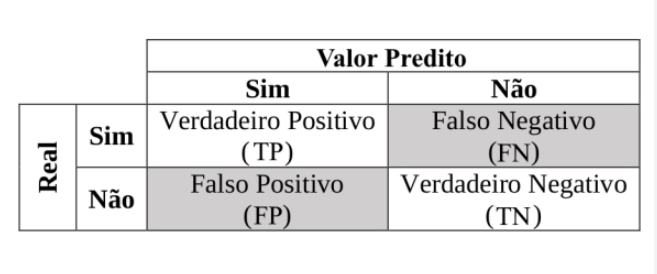

- 51904 -> Verdadeiros Positivos -  Eram Não 3 e foram classificados como Não 3
- 5245 -> Verdadeiros Negativos - Eram 3 e foram classificados como 3
- 886 -> Falso Positivo - Foram classificado como 3 mas eram não 3
- 1965 -> Falso Negativo - Foram classificados como não 3 mas era 3


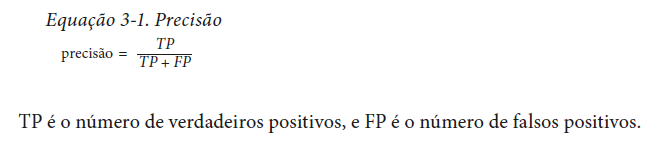

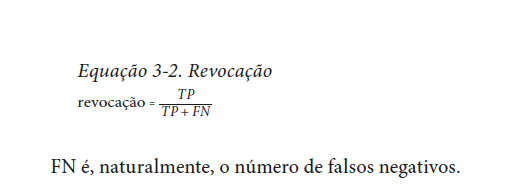

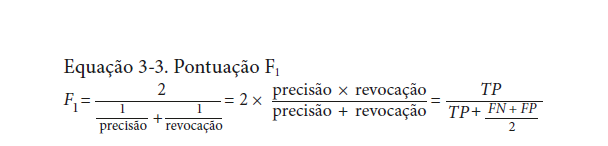

- **Precisão**: Utilizada quando falsos positivos são considerados mais prejudiciais que os falsos negativos

- **Revocação**: Falsos negativos são considerados mais prejudiciais que os falsos positivos (contrário da precisão).

- A **pontuação F1** favorece classificadores com precisão e revocação similares. A utilização da melhor métrica vai variar com o problema proposto.

In [ ]:
# Relatório com as métricas
print(classification_report(y_train_3, y_train_pred, target_names= ['Não é 3', 'É 3']))

              precision    recall  f1-score   support

     Não é 3       0.98      0.97      0.98     53869
         É 3       0.78      0.84      0.81      6131

    accuracy                           0.96     60000
   macro avg       0.88      0.90      0.89     60000
weighted avg       0.96      0.96      0.96     60000



In [ ]:
# Pontuação de todas as instâncias
y_scores = cross_val_predict(sgd_claf, X_train, y_train_3, cv=3, method='decision_function')

In [ ]:
# Métricas
precision, recall, thresholds = precision_recall_curve(y_train_3, y_scores)

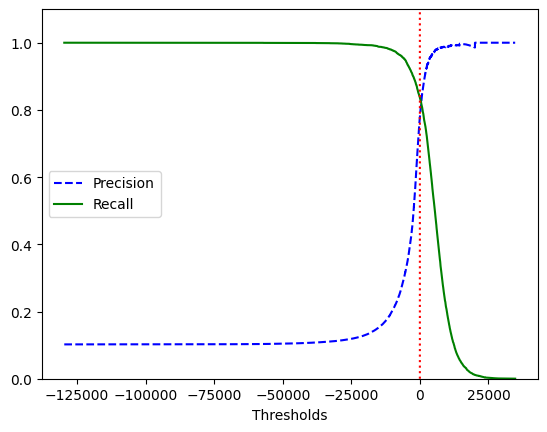

In [ ]:
# Gráfico
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot([0,1.1], color='r', linestyle=':')
plt.xlabel('Thresholds')
plt.legend(loc='center left')
plt.ylim([0,1.1]);

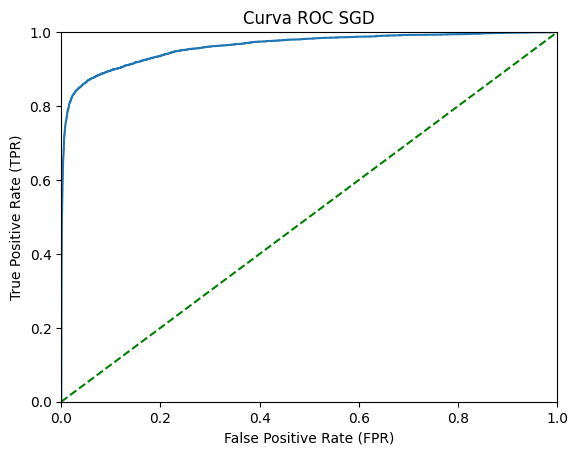

In [ ]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_train_3, y_scores)
plt.plot(fpr,tpr)
plt.plot([0,1], 'g--')
plt.axis([0, 1, 0, 1]) # [xmin, xmax, ymin, ymax]
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC SGD')
plt.show()

In [ ]:
# Área debaixo da Curva ROC
# Classificador perfeito area = 1 , classificador aleatório area = 0.5
roc_auc_score(y_train_3, y_scores) # 0.96

0.9615833779378871

### Random Forest

In [ ]:
# Random Forest e sua probabilidade de positivo ou não positivo
rf_claf = RandomForestClassifier(n_estimators=100, random_state=14)
y_prob_rf = cross_val_predict(rf_claf, X_train, y_train_3, cv=3, method='predict_proba')

In [ ]:
# Probabilidade da classe ser negativa e seus valores de FPR e TPR
y_scores_rf = y_prob_rf[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_train_3, y_scores_rf)

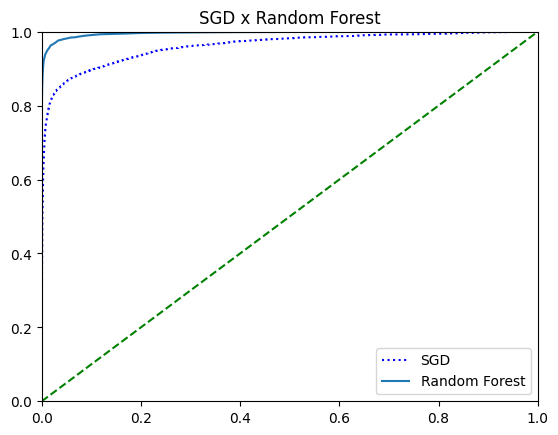

In [ ]:
# Gráfico de comparação entre curva ROC com SGD E Random Forest
plt.title('SGD x Random Forest')
plt.plot(fpr, tpr, 'b:', label='SGD')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.legend(loc='lower right')
plt.axis([0,1,0,1])
plt.plot([0,1], 'g--')
plt.show()

In [ ]:
# Área de baixo da Curva ROC da Random Forest
roc_auc_score(y_train_3, y_scores_rf) # 0.996

0.9960111040866069

 # Classificação Multiclasse

 Quando valor de saída pertence exclusivamente a uma classe e possui diversos valores possíveis.

Alguns algoritmos são capazes de lidar diretamente com multiclasses. Outros são estritamente binários, porém, existem estratégias para realizar classificação multiclasse para algoritmos binários.

In [ ]:
# Modelo de One vs Rest utilizando o SGDClassifier
ovr_claf = OneVsRestClassifier(SGDClassifier(random_state=14))

# Treinamento
ovr_claf.fit(X_train, y_train)

# Quantidade de estimadores
len(ovr_claf.estimators_)

10

OvA - one-versus-the-rest (um contra todos): Cria-se um algortimo binário para cada classe presente no problema.

In [ ]:
# Modelo de One vs One utilizando o SGDClassifier
ovo_claf = OneVsOneClassifier(SGDClassifier(random_state=14))

# Treinamento
ovo_claf.fit(X_train, y_train)

# Quantidade de estimadores
len(ovo_claf.estimators_)

45

OvO - one-versus-one (um contra um): Cria-se um algoritmo binário comparando cada classe do problema com outra. Se tiver N classes, serão treinados N x (N-1)/ 2 classificadores.

In [ ]:
# Acúracia da Validação Cruazada sem Padronização
cross_val_score(sgd_claf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87165, 0.8624 , 0.868  ])

In [ ]:
# Instanciando Padronização
scaler = StandardScaler()

# Alterando os valor de X_train para padrões
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))

# Validação cruzada com Padronização
cross_val_score(sgd_claf, X_train_scaler, y_train, cv=3, scoring='accuracy')

array([0.8943 , 0.89765, 0.90425])

In [ ]:
# Previsão dos valores de y treino com valores de X padronizados
y_train_pred = cross_val_predict(sgd_claf, X_train_scaler, y_train, cv=3)

# Criação da matrix de confusao
conf_mx = confusion_matrix(y_train, y_train_pred)

# Matrix de confusao
conf_mx

array([[5583,    0,   19,    7,    9,   43,   29,    4,  228,    1],
       [   0, 6415,   44,   26,    4,   42,    5,    7,  188,   11],
       [  23,   28, 5228,   93,   74,   20,   68,   40,  376,    8],
       [  28,   19,  108, 5240,    0,  191,   21,   44,  412,   68],
       [  11,   14,   38,    9, 5241,    9,   34,   17,  330,  139],
       [  25,   17,   29,  158,   57, 4421,   79,   20,  550,   65],
       [  31,   19,   47,    3,   41,   81, 5541,   10,  145,    0],
       [  17,   14,   50,   24,   45,   13,    3, 5690,  198,  211],
       [  15,   62,   42,   95,    3,  117,   27,    8, 5437,   45],
       [  22,   21,   27,   56,  123,   31,    1,  176,  364, 5128]])

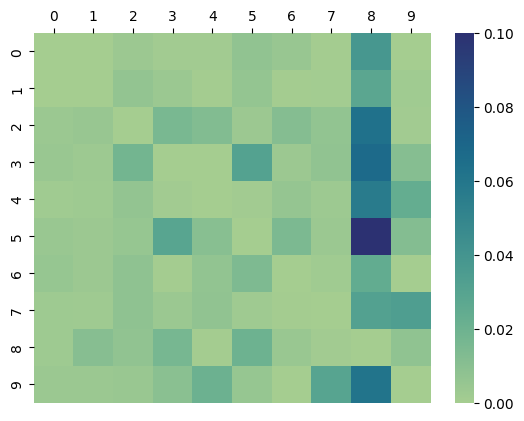

In [ ]:
# Somatorio dos valores das colunas
row_sums = conf_mx.sum(axis=1, keepdims=True)

# Taxa de erro
norm_conf_mx = conf_mx / row_sums

# Preenchendo diagonal com valores de zero
np.fill_diagonal(norm_conf_mx, 0)

# Mapa de Calor da matriz de confusao
sns.heatmap(norm_conf_mx, cmap='crest', vmin=0, vmax=0.1).xaxis.tick_top()

# Classificação Multilabel

Quando o valor de saída pertence a duas ou mais classes.

In [ ]:
 # Criando multilabel
y_train_large = (np.array(y_train, int) >= 7) # Retorna valor booleano para numero igual 7 ou maior ////// Type mudada de categorica para int
y_train_odd = ((np.array(y_train, int) % 2) == 1) # Retorna valor booleano para valores impares
y_multilabel = np.c_[y_train_large, y_train_odd] # Criando y com duas variaveis

In [ ]:
# Modelo KNN
knn_claf = KNeighborsClassifier()

# Treinamento
knn_claf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
# Predição da linha 2000
knn_claf.predict([X_train.iloc[2000]])

array([[False, False]])

In [ ]:
# Predição De y multilabel
y_train_knn_pred = cross_val_predict(knn_claf, X_train, y_multilabel, cv=3)

# Multioutput

Quando valor de saída é multilabel e pode assumir diversos valores.

Ex: Limpar uma imagem. Onde se tem como saída um rótulo para o pixels (multilabel) e que podem assumir valores de 0 a 255 (multiclasse).


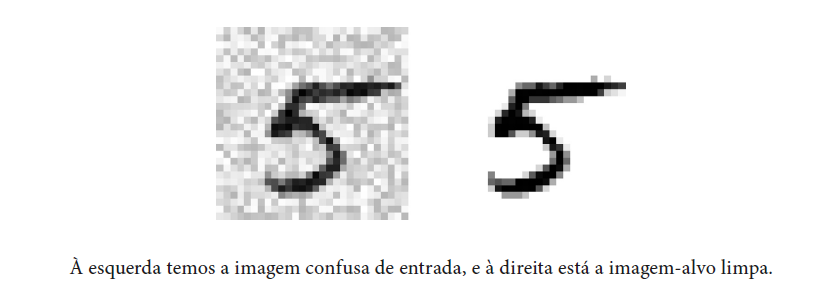


# EXERCÍCIOS

## 1 - Conseguir acúracia de 97% ou mais.

In [ ]:
# Dicionário de hiperparametros
dict_param = {'n_neighbors': [3, 4, 5 , 7],
              'weights': ['uniform', 'distance'],
              'leaf_size': [30, 60],
              }

# Classificador
knn_claf = KNeighborsClassifier()

# Treinamento para achar os melhores hiperparametros
clf = GridSearchCV(knn_claf, dict_param, cv=5)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'leaf_size': 30, 'n_neighbors': 4, 'weights': 'distance'}


In [ ]:
# Classificador com os melhores hiperparametro
knn_claf = KNeighborsClassifier(leaf_size=30, n_neighbors=4, weights='distance')

# Treinamento
knn_claf.fit(X_train, y_train)

# Previsão de y no treino de teste
y_previsto = knn_claf.predict(X_test)

# Acúracia
accuracy_score(y_test, y_previsto)

0.9714

## Uma função para criar cópias das imagens deslocadas e adicionar no dataset

In [ ]:
# Função de mover a imagem
def mover_imagem(imagem, dx, dy):
    imagem = imagem.reshape((28, 28)) # Mudando dimensão para uma matrix 28x28
    imagem_move = shift(imagem, [dy, dx]) # Movendo imagem. dy, dx -> varição/derivada em x e y
    return imagem_move.reshape([-1]) # Mudando dimensão para 1x784

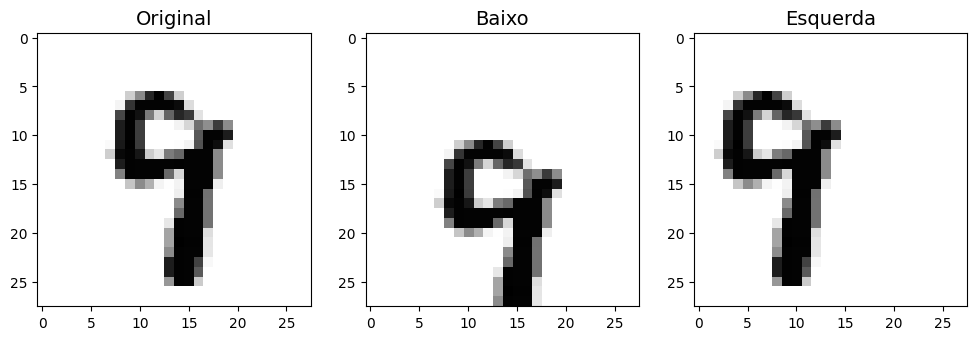

In [ ]:
# Escolhendo uma imagem do dataset
imagem = np.array(X_train.iloc[10000])

# Movendo imagem para baixo e esquerda
shifted_image_down = mover_imagem(imagem, 0, 5)
shifted_image_left = mover_imagem(imagem, -5, 0)

# Plotando gráfico
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(imagem.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Baixo", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Esquerda", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys");

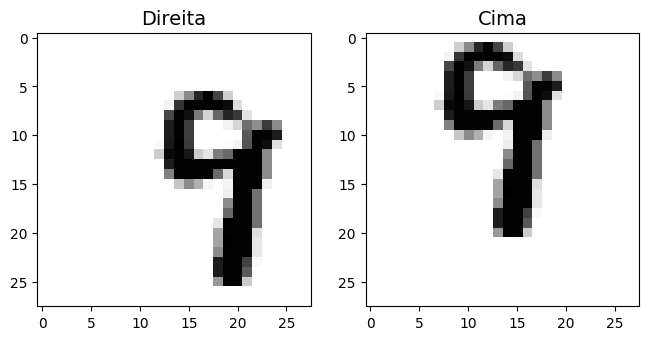

In [ ]:
# Movendo imagem para direita e cima
shifted_image_right = mover_imagem(imagem, 5, 0)
shifted_image_up = mover_imagem(imagem, 0, -5)

# Plotando gráfico
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title('Direita', fontsize=14)
plt.imshow(shifted_image_right.reshape(28,28), cmap='Greys')
plt.subplot(132)
plt.title('Cima', fontsize=14)
plt.imshow(shifted_image_up.reshape(28,28), cmap='Greys');

In [ ]:
# Criação das imagens deslocadas para esquerda, direita, cima e baixa
X_train_augmented = [mover_imagem(imagem, dx, dy) for dx,dy in [[1,0], [-1,0], [0,1], [0,-1]] for imagem in np.array(X_train)]

# Concatenação dos dados criados com o original
X_train_shifted = np.concatenate((X_train, X_train_augmented))

In [ ]:
# Loop para criar novos valores de y
y_train_augmented = []
for i in range(4):
  for y in y_train:
    y_train_augmented.append(y)

# Concatenação das labels criadas com o original
y_train_shifted = np.concatenate((y_train, y_train_augmented))

In [ ]:
# Classificador com os melhores hiperparametro
knn_claf = KNeighborsClassifier(leaf_size=30, n_neighbors=4, weights='distance')

# Treinamento
knn_claf.fit(X_train_shifted, y_train_shifted)

# Previsão de y no treino de teste
y_previsto = knn_claf.predict(X_test)

# Acúracia
accuracy_score(y_test, y_previsto)

0.9763

## Titanic

**Objetivo**: Classificar se o passageiro sobreviveu (1) ou nao sobreviveu (0)

**Tipo de Aprendizagem**: Supervisionado

**Métrica**: Acúracia

**Variáveis**:
- PassengerId -> Id do passageiros
- Survived -> Sobreviveu ou Não (variável target)
- Pclass -> Classe do ticket -> 1= Primeira Classe, 2= Segunda Classe
- Name -> Nome do Passageiro com título (Mrs, Ms, ...)
- Sex -> Homem ou Mulher
- SibSp -> Número de irmãos e conjuges
- Parch -> Número de pais e filhos
- Ticket -> Número do ticket
- Fare -> Tarifa do passageiro
- Cabin -> número da cabine
- Embarked -> Porto de embarque -> C= Cherbourg, Q= Queenstown, S=Southampton

In [ ]:
# dataframe de treino
tita_train = pd.read_csv("/content/drive/MyDrive/Programação/LIVRO O'REILLY/3_CAPITULO/train.csv")

# dataframe de teste
tita_test = pd.read_csv("/content/drive/MyDrive/Programação/LIVRO O'REILLY/3_CAPITULO/test.csv")

In [ ]:
# Dataframe
tita_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Informações do dataset
tita_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Valores nulos presentes por coluna/variável
tita_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Quantidade de valores diferentes por cada variável
tita_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

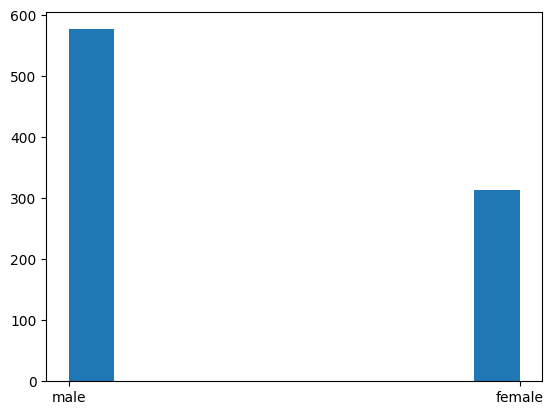

In [ ]:
# Histograma do Sexo
plt.hist(tita_train['Sex']);

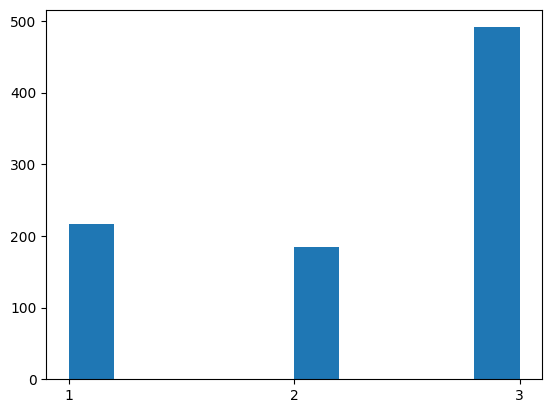

In [ ]:
# Histograma por classe do vagão
plt.hist(tita_train['Pclass'])
plt.xticks([1,2,3]);

In [ ]:
tita_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Informações das variáveis continuas
tita_train[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


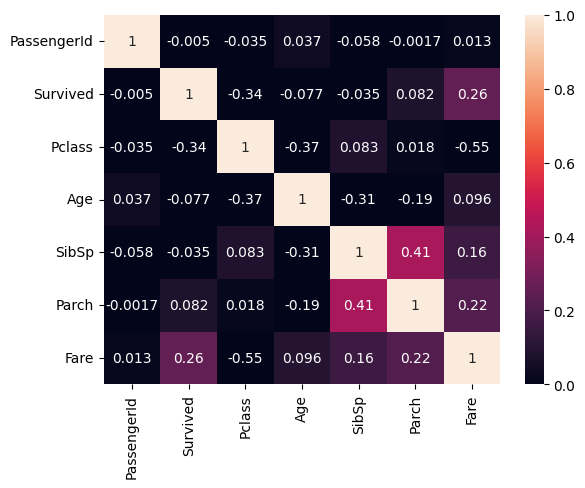

In [ ]:
# Mapa de Calor de correlação
sns.heatmap(tita_train.corr(), annot=True, vmin=0, vmax=1);

### Primeiro Modelo

In [ ]:
# Separando x e y
x_train = tita_train.drop(['Survived'], axis=1)
y_train = tita_train['Survived']

In [ ]:
x_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

Motivos de retirar as seguintes variáveis:
- PassengerId = Apenas um número de identificação do passageiro, não há importância nessa situação de análise.
- Cabin = Alta % de valores missing e dos poucos valores que sobraram há uma grande diferença de valores. É possível analisa-la mas optei por retirar.
- Ticket e Name = São possiveis de ser analisadas mas para simplificar o problema não serão utilizadas.

In [ ]:
# Preenchendo valores missing em Age com a média
x_train['Age'].fillna(x_train['Age'].median(), axis=0, inplace=True )
# Preenchendo valores missing em Embarked com o valor que mais se repete
x_train['Embarked'].fillna('S', axis=0, inplace=True)

In [ ]:
# Variáveis STR são transformados em novas variáveis one hot enconder
x_train_dummie = pd.get_dummies(x_train, drop_first=True)

In [ ]:
# Modelo Random Forest
rf_class = RandomForestClassifier()

# Previsão utilizando cross validation
y_train_pred_rf = cross_val_predict(rf_class, x_train_dummie, y_train, cv=3)

# Criação da matrix de confusao
conf_mx = confusion_matrix(y_train, y_train_pred_rf)

print(conf_mx)

[[463  86]
 [ 98 244]]


In [ ]:
print(f'Acúracia: {round(accuracy_score(y_train, y_train_pred_rf), 3)}')

Acúracia: 0.793


In [ ]:
# Modelo Random Forest
sgd_class = SGDClassifier(random_state=12)

# Previsão utilizando cross validation
y_train_pred_sgd = cross_val_predict(sgd_class, x_train_dummie, y_train, cv=3)

# Criação da matrix de confusao
conf_mx = confusion_matrix(y_train, y_train_pred_sgd)

print(conf_mx)

[[433 116]
 [148 194]]


In [ ]:
print(f'Acúracia: {round(accuracy_score(y_train, y_train_pred_sgd), 3)}')

Acúracia: 0.704


In [ ]:
# Modelo Random Forest
kn_class = KNeighborsClassifier()

# Previsão utilizando cross validation
y_train_pred_kn = cross_val_predict(kn_class, x_train_dummie, y_train, cv=3)

# Criação da matrix de confusao
conf_mx = confusion_matrix(y_train, y_train_pred_kn)

print(conf_mx)

[[442 107]
 [158 184]]


In [ ]:
print(f'Acúracia: {round(accuracy_score(y_train, y_train_pred_kn), 3)}')

Acúracia: 0.703


In [ ]:
# Dicionário de Parâmetros
dict_param = {'n_estimators': [50, 100, 150, 250, 500, 750 ,1000],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 15, 25, 50, 100]
}

# Random Forest
rf_class = RandomForestClassifier()

# GridSearch e Melhores parâmetros
clf = GridSearchCV(rf_class, dict_param, cv=5)
clf.fit(x_train_dummie, y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


In [ ]:
# Modelo Random Forest
rf_class = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10)

# Previsão utilizando cross validation
y_train_pred_rf = cross_val_predict(rf_class, x_train_dummie, y_train, cv=3)

# Criação da matrix de confusao
conf_mx = confusion_matrix(y_train, y_train_pred_rf)

print(conf_mx)

[[482  67]
 [ 97 245]]


In [ ]:
print(f'Acúracia: {round(accuracy_score(y_train, y_train_pred_rf), 3)}')

Acúracia: 0.816
